### Создаем функцию для создание и применение маски

In [24]:
def main_function(masked_array, name_vaue):   
    image = cv2.imread('image_1024_aligned_rgb.png')
    
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
   
    points_reshaped = [masked_array.reshape((-1, 1, 2))]
    
    cv2.fillPoly(mask, points_reshaped, 255)
    result = cv2.bitwise_and(image, image, mask=mask)
  
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
   
    x, y, w, h = cv2.boundingRect(contours[0])
    
    cropped_image = result[y:y+h, x:x+w]
   
    b, g, r = cv2.split(cropped_image)
    alpha = np.where(mask[y:y+h, x:x+w] == 0, 0, 255).astype(np.uint8) 
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba)

    file_path = os.path.join('wall_image', f'{name_vaue}.png')
    
    cv2.imwrite( file_path, dst)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
  

### Загружаем данные, и обрабатываем массив фильтром гаууса, для более ровных границ маски

In [25]:
import numpy as np
import os
import cv2 
from scipy.ndimage import gaussian_filter

zero_array = np.zeros((1, 1024))
filled_array = np.full((1, 1024), 512)



vc = np.load("v_corners.npy")
vc_T = vc.T
data = np.load("h_corners.npy")

sigma = 2  
hc = gaussian_filter(data, sigma=[0, sigma]) 



### Обрабатываем входные массивы для создание маски

In [26]:
import numpy as np
import os
import cv2 
from scipy.ndimage import gaussian_filter

hc = smoothed_data

x_range = np.arange(0, 1024, dtype= int)

result_fer = np.vstack([x_range, hc[0]])
result_sec = np.vstack([x_range, hc[1]])
result_y_down = np.vstack([x_range, zero_array])
result_y_down = np.vstack([x_range, filled_array])

result_fer = result_fer.T
result_sec = result_sec.T
rresult_sec_rever = np.flip(result_sec, axis=0)
result_all = np.vstack([result_fer, rresult_sec_rever])


vc_index = np.unique(vc_T[0].astype(np.int32))


vc_index_zero = np.insert(vc_index, 0, 0)
vc_index_full_size = np.append(vc_index_zero,1024)

vc_index_full_size
wall_name = np.array(['door_1','wall_1','wall_window','wall_2','wall_3','wall_4','door_2'], dtype=object)
floor = np.array('floor', dtype=object)
ceiling = np.array('ceiling', dtype=object)


### Создаем массив для маски, после чего передаем данные в функцию

In [27]:

zero_array = np.zeros((1, 1024))
filled_array = np.full((1, 1024), 512)
result_up = np.vstack([x_range,zero_array])
result_down = np.vstack([x_range, filled_array])

result_up_T = result_up.T
result_down_T = result_down.T

result_fer_rever = np.flip(result_fer, axis=0)

result_up_mask = np.vstack([result_up_T,result_fer_rever])
result_up_down = np.vstack([result_down_T,rresult_sec_rever])

result_all_int_up = result_up_mask.astype(int)
result_all_int_down = result_up_down.astype(int)


celling_func = main_function(result_all_int_up,ceiling)  
floor_function = main_function(result_all_int_down ,floor)

### Цикл для создания отдельных фрагментов стен

In [28]:

for i in range(0,len(vc_index_full_size)-1):


    slise_mask = hc[:, vc_index_full_size[i]:vc_index_full_size[i+1]]
    x_range_mask = np.arange(vc_index_full_size[i],vc_index_full_size[i+1], dtype= int)

    result_fer = np.vstack([x_range_mask, slise_mask[0]])
    result_sec = np.vstack([x_range_mask, slise_mask[1]])
    result_fer = result_fer.T
    result_sec = result_sec.T
    rresult_sec_rever = np.flip(result_sec, axis=0)
    result_all_slise = np.vstack([result_fer, rresult_sec_rever])

    result_all_int = result_all.astype(int)
    result_all_int = result_all_slise.astype(int)

    slise_mask_int = slise_mask.astype(int)
    wall_func = main_function(result_all_int, wall_name[i])

### Функция изменения разрешения, с применение бикубической интерполяицией

In [29]:

def function_superresolute(image_name, height, width):
    
    image_path = os.path.join('wall_image', f'{image_name}.png')
    image = cv2.imread(image_path)
  
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC)
    
 
    if not os.path.exists('main_image'):
        os.makedirs('main_image')
    
  
    file_path = os.path.join('main_image', f'{image_name}_resized.png')
    cv2.imwrite(file_path, resized_image)
    print(f"Image saved at {file_path}")

### Вызывам функцию и передаем данные, для изменения разрешения. В этом случае, каждый пиксель равен 1 см 

In [30]:
door1 = function_superresolute('door_1', 250,165 )
wall_1 = function_superresolute('wall_1', 250, 602)
wall_window = function_superresolute('wall_window', 250, 205 )
wall_2 = function_superresolute('wall_2', 250,164 )
wall_3 = function_superresolute('wall_3', 250, 130)
wall_4 = function_superresolute('wall_4', 250, 438)
floor = function_superresolute('floor', 165, 602)
ceiling = function_superresolute('ceiling', 165, 602)

Image saved at main_image\door_1_resized.png
Image saved at main_image\wall_1_resized.png
Image saved at main_image\wall_window_resized.png
Image saved at main_image\wall_2_resized.png
Image saved at main_image\wall_3_resized.png
Image saved at main_image\wall_4_resized.png
Image saved at main_image\floor_resized.png
Image saved at main_image\ceiling_resized.png


#анализ изображение через алгоримт сегментации Канни 

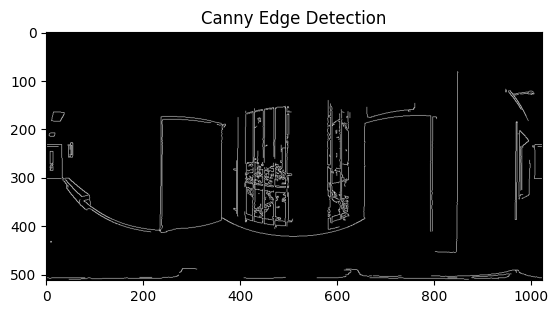

In [21]:
import matplotlib.pyplot as plt

image = cv2.imread('image_1024_aligned_rgb.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image_gray, threshold1=100, threshold2=200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


In [22]:
import pandas as pd

df = pd.read_json("test_object_lu.json")
df = df.drop(['room_id'], axis=1)

df['walls'] = df['walls'].apply(lambda x: ','.join(map(str, x)))

df[['wallx1', 'wallx2', 'wallx3', 'wallx4']] = df['walls'].str.split(',', expand=True).astype(int)
df = df.drop(['walls'], axis=1)

print(df)


   wallx1  wallx2  wallx3  wallx4
0       0       0       0    2050
1       0       0    1640       0
2    1640       0    1640     400
3    1640     400    6020     400
4    6020     400    6020    2050
5       0    2050    6020    2050


In [23]:
import numpy as np
numpy_arr = df.to_numpy()

arr_as_str = numpy_arr.astype(str)

arr_without_spaces = np.char.replace(arr_as_str, ' ', '')
numpy_array = arr_without_spaces.astype(str)
numpy_array

array([['0', '0', '0', '2050'],
       ['0', '0', '1640', '0'],
       ['1640', '0', '1640', '400'],
       ['1640', '400', '6020', '400'],
       ['6020', '400', '6020', '2050'],
       ['0', '2050', '6020', '2050']], dtype='<U4')